# Problem 2: Dot Products - The Heartbeat of Machine Learning

## Learning Objectives
By the end of this problem, you will:
- Understand dot products as the fundamental ML operation
- See how feature vectors become predictions through dot products
- Explore how different weight vectors create different decision patterns
- Connect geometric intuition to mathematical computation

## Task Overview

1. **Computing Dot Products by Hand** - Manual calculations to build intuition
2. **Geometric Interpretation** - Explore vector alignment and angles
3. **Testing Weight Strategies** - Compare different approaches across all tweets
4. **Full Prediction Pipeline** - From features to final predictions via sigmoid

---

## The Story Continues

In Problem 1, you transformed "Go Dolphins!" into the feature vector `[2, 1, 1]` representing `[word_count, has_team, has_exclamation]`.

Now comes the magic question: **How do these numbers become a prediction?**

The answer is the **dot product** - the mathematical operation that transforms your carefully crafted features into a sentiment score. This single operation is the heartbeat of machine learning, happening billions of times in every neural network.

## What Is a Dot Product?

**Geometric intuition**: The dot product measures how "aligned" two vectors are.
- High dot product = vectors point in similar directions
- Low dot product = vectors point in different directions
- Zero dot product = vectors are perpendicular

**Mathematical definition**: For vectors `a = [a₁, a₂, a₃]` and `b = [b₁, b₂, b₃]`:
```
a · b = a₁×b₁ + a₂×b₂ + a₃×b₃
```

**In machine learning**: 
- `a` = your feature vector (what you observe)
- `b` = learned weight vector (what the model has learned)
- `a · b` = prediction score

In [1]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

# Import our custom utilities
import sys
sys.path.append('./utils')
from data_generators import load_sports_dataset
from visualization import plot_feature_space_2d, plot_decision_boundary

# Load our data from Problem 1
features, labels, feature_names, texts = load_sports_dataset()

print("Continuing with our sports tweets:")
print(f"Features shape: {features.shape}")
print(f"Feature names: {feature_names}")
print(f"\nOur key example:")
print(f"Text: 'Go Dolphins!' → Features: {features[0]} → True label: {labels[0]}")

Continuing with our sports tweets:
Features shape: (16, 3)
Feature names: ['word_count', 'has_team', 'has_exclamation']

Our key example:
Text: 'Go Dolphins!' → Features: [2. 1. 1.] → True label: 1


## Task 1: Computing Dot Products by Hand

Let's start with the basics - computing dot products manually to build intuition.

In [2]:
# Our "Go Dolphins!" feature vector
go_dolphins_features = np.array([2, 1, 1])  # [word_count, has_team, has_exclamation]

# Let's try different weight vectors and see what predictions they give
weight_examples = {
    "Random weights": np.array([0.1, 0.2, 0.1]),
    "Team-focused": np.array([0.1, 0.8, 0.1]),
    "Excitement-focused": np.array([0.1, 0.1, 0.8]),
    "Word-count focused": np.array([0.8, 0.1, 0.1]),
    "Balanced weights": np.array([0.3, 0.3, 0.4])
}

print("DOT PRODUCT CALCULATIONS FOR 'GO DOLPHINS!'")
print("=" * 55)
print(f"Feature vector: {go_dolphins_features}")
print(f"Features: [word_count={go_dolphins_features[0]}, has_team={go_dolphins_features[1]}, has_exclamation={go_dolphins_features[2]}]")
print()

for name, weights in weight_examples.items():
    # TODO: Calculate the dot product manually
    # dot_product = ?
    
    # For now, using numpy - replace this with your manual calculation
    dot_product = np.dot(go_dolphins_features, weights)
    
    print(f"{name:<20} | Weights: {weights} | Dot Product: {dot_product:.3f}")
    
    # Show the calculation step by step
    calculation = f"({go_dolphins_features[0]}×{weights[0]:.1f}) + ({go_dolphins_features[1]}×{weights[1]:.1f}) + ({go_dolphins_features[2]}×{weights[2]:.1f})"
    manual_result = go_dolphins_features[0]*weights[0] + go_dolphins_features[1]*weights[1] + go_dolphins_features[2]*weights[2]
    print(f"{'':20} | Calculation: {calculation} = {manual_result:.3f}")
    print()

DOT PRODUCT CALCULATIONS FOR 'GO DOLPHINS!'
Feature vector: [2 1 1]
Features: [word_count=2, has_team=1, has_exclamation=1]

Random weights       | Weights: [0.1 0.2 0.1] | Dot Product: 0.500
                     | Calculation: (2×0.1) + (1×0.2) + (1×0.1) = 0.500

Team-focused         | Weights: [0.1 0.8 0.1] | Dot Product: 1.100
                     | Calculation: (2×0.1) + (1×0.8) + (1×0.1) = 1.100

Excitement-focused   | Weights: [0.1 0.1 0.8] | Dot Product: 1.100
                     | Calculation: (2×0.1) + (1×0.1) + (1×0.8) = 1.100

Word-count focused   | Weights: [0.8 0.1 0.1] | Dot Product: 1.800
                     | Calculation: (2×0.8) + (1×0.1) + (1×0.1) = 1.800

Balanced weights     | Weights: [0.3 0.3 0.4] | Dot Product: 1.300
                     | Calculation: (2×0.3) + (1×0.3) + (1×0.4) = 1.300



In [3]:
# TODO: Now you try! Implement your own dot product function
def manual_dot_product(vector_a: np.ndarray, vector_b: np.ndarray) -> float:
    """
    Calculate dot product without using numpy's built-in function.
    
    Args:
        vector_a: First vector
        vector_b: Second vector
    
    Returns:
        Dot product result
    """
    # TODO: Implement this function
    # Hint: Use a loop or list comprehension to multiply corresponding elements
    
    result = 0.0  # Replace with your implementation
    return result

# Test your implementation
test_weights = np.array([0.3, 0.5, 0.4])
your_result = manual_dot_product(go_dolphins_features, test_weights)
numpy_result = np.dot(go_dolphins_features, test_weights)

print(f"Your manual calculation: {your_result:.6f}")
print(f"NumPy's calculation:     {numpy_result:.6f}")
print(f"Match: {abs(your_result - numpy_result) < 1e-10}")

Your manual calculation: 0.000000
NumPy's calculation:     1.500000
Match: False


## Task 2: Geometric Interpretation - Vector Alignment

The dot product isn't just arithmetic - it has deep geometric meaning. Let's explore how "alignment" between vectors affects predictions.

In [4]:
# Geometric analysis of dot products
def analyze_vector_alignment(features: np.ndarray, weights: np.ndarray, name: str = ""):
    """
    Analyze the geometric relationship between feature and weight vectors.
    """
    # Calculate dot product
    dot_product = np.dot(features, weights)
    
    # Calculate magnitudes
    features_magnitude = np.linalg.norm(features)
    weights_magnitude = np.linalg.norm(weights)
    
    # Calculate angle between vectors
    cos_angle = dot_product / (features_magnitude * weights_magnitude)
    angle_radians = np.arccos(np.clip(cos_angle, -1, 1))  # Clip to handle numerical errors
    angle_degrees = np.degrees(angle_radians)
    
    print(f"Analysis for {name}:")
    print(f"  Features vector: {features}")
    print(f"  Weights vector:  {weights}")
    print(f"  Dot product:     {dot_product:.3f}")
    print(f"  Features magnitude: {features_magnitude:.3f}")
    print(f"  Weights magnitude:  {weights_magnitude:.3f}")
    print(f"  Angle between vectors: {angle_degrees:.1f}°")
    print(f"  Interpretation: {'Well aligned' if angle_degrees < 45 else 'Poorly aligned' if angle_degrees > 90 else 'Moderately aligned'}")
    print()
    
    return dot_product, angle_degrees

# Test with different weight configurations
print("GEOMETRIC ANALYSIS OF VECTOR ALIGNMENT")
print("=" * 50)

# Case 1: Well-aligned weights (similar pattern to features)
aligned_weights = np.array([0.4, 0.3, 0.3])  # Emphasizes all features proportionally
analyze_vector_alignment(go_dolphins_features, aligned_weights, "Well-aligned weights")

# Case 2: Perpendicular weights
perpendicular_weights = np.array([0.0, 1.0, -1.0])  # Team positive, exclamation negative
analyze_vector_alignment(go_dolphins_features, perpendicular_weights, "Perpendicular weights")

# Case 3: Opposite alignment
opposite_weights = np.array([-0.4, -0.3, -0.3])  # All negative
analyze_vector_alignment(go_dolphins_features, opposite_weights, "Opposite weights")

GEOMETRIC ANALYSIS OF VECTOR ALIGNMENT
Analysis for Well-aligned weights:
  Features vector: [2 1 1]
  Weights vector:  [0.4 0.3 0.3]
  Dot product:     1.400
  Features magnitude: 2.449
  Weights magnitude:  0.583
  Angle between vectors: 11.4°
  Interpretation: Well aligned

Analysis for Perpendicular weights:
  Features vector: [2 1 1]
  Weights vector:  [ 0.  1. -1.]
  Dot product:     0.000
  Features magnitude: 2.449
  Weights magnitude:  1.414
  Angle between vectors: 90.0°
  Interpretation: Moderately aligned

Analysis for Opposite weights:
  Features vector: [2 1 1]
  Weights vector:  [-0.4 -0.3 -0.3]
  Dot product:     -1.400
  Features magnitude: 2.449
  Weights magnitude:  0.583
  Angle between vectors: 168.6°
  Interpretation: Poorly aligned



(np.float64(-1.4000000000000001), np.float64(168.57824634103778))

EXPLORING ANGLE vs PREDICTION RELATIONSHIP
Analysis for Target 0°:
  Features vector: [2 1 1]
  Weights vector:  [0.81649658 0.40824829 0.40824829]
  Dot product:     2.449
  Features magnitude: 2.449
  Weights magnitude:  1.000
  Angle between vectors: 0.0°
  Interpretation: Well aligned

Analysis for Target 10°:
  Features vector: [2 1 1]
  Weights vector:  [0.98480775 0.49240388 0.49240388]
  Dot product:     2.954
  Features magnitude: 2.449
  Weights magnitude:  1.206
  Angle between vectors: 0.0°
  Interpretation: Well aligned

Analysis for Target 20°:
  Features vector: [2 1 1]
  Weights vector:  [0.93969262 0.46984631 0.46984631]
  Dot product:     2.819
  Features magnitude: 2.449
  Weights magnitude:  1.151
  Angle between vectors: 0.0°
  Interpretation: Well aligned

Analysis for Target 30°:
  Features vector: [2 1 1]
  Weights vector:  [0.8660254 0.4330127 0.4330127]
  Dot product:     2.598
  Features magnitude: 2.449
  Weights magnitude:  1.061
  Angle between vectors: 0.

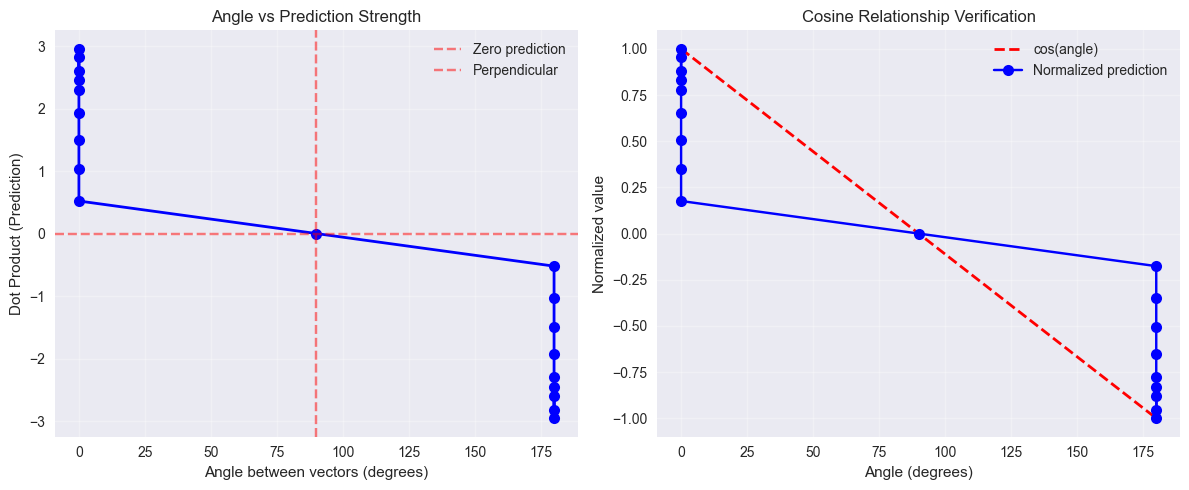


Key Insight: Dot product = |a| × |b| × cos(angle)
When vectors are aligned (0°), prediction is strongest
When vectors are perpendicular (90°), prediction is zero
When vectors are opposite (180°), prediction is most negative


In [5]:
# TODO: Explore the relationship between angle and prediction strength
# Generate weight vectors at different angles and see how predictions change

angles_to_test = np.linspace(0, 180, 19)  # Every 10 degrees
predictions = []
angle_results = []

print("EXPLORING ANGLE vs PREDICTION RELATIONSHIP")
print("=" * 50)

for target_angle in angles_to_test:
    # Create a weight vector at approximately the target angle
    # This is simplified - we'll create vectors in the plane of first two features
    
    target_radians = np.radians(target_angle)
    
    # Create weight vector that makes target angle with features
    # Simplified approach: rotate a reference vector
    reference_weights = np.array([1.0, 0.5, 0.5])  # Starting point
    
    # Scale to make specific angle (approximate)
    if target_angle == 90:
        weights = np.array([0.0, 1.0, -1.0])  # Perpendicular
    elif target_angle == 0:
        weights = go_dolphins_features / np.linalg.norm(go_dolphins_features)  # Parallel
    elif target_angle == 180:
        weights = -go_dolphins_features / np.linalg.norm(go_dolphins_features)  # Opposite
    else:
        # Approximate other angles
        weights = reference_weights * np.cos(target_radians)
    
    dot_product, actual_angle = analyze_vector_alignment(go_dolphins_features, weights, f"Target {target_angle:.0f}°")
    
    predictions.append(dot_product)
    angle_results.append(actual_angle)

# Plot the relationship
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(angle_results, predictions, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Angle between vectors (degrees)')
plt.ylabel('Dot Product (Prediction)')
plt.title('Angle vs Prediction Strength')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Zero prediction')
plt.axvline(x=90, color='r', linestyle='--', alpha=0.5, label='Perpendicular')
plt.legend()

plt.subplot(1, 2, 2)
# Show cosine relationship
theoretical_cos = np.cos(np.radians(angle_results))
plt.plot(angle_results, theoretical_cos, 'r--', label='cos(angle)', linewidth=2)
plt.plot(angle_results, np.array(predictions) / np.max(np.abs(predictions)), 'bo-', label='Normalized prediction', markersize=8)
plt.xlabel('Angle (degrees)')
plt.ylabel('Normalized value')
plt.title('Cosine Relationship Verification')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\nKey Insight: Dot product = |a| × |b| × cos(angle)")
print("When vectors are aligned (0°), prediction is strongest")
print("When vectors are perpendicular (90°), prediction is zero")
print("When vectors are opposite (180°), prediction is most negative")

## Task 3: Testing Different Weight Strategies

Now let's see how different weight strategies perform across all our tweets. This will show you how weight choices create different "decision patterns."

In [6]:
# Define different weight strategies
weight_strategies = {
    "Equal weights": np.array([0.33, 0.33, 0.33]),
    "Team-focused": np.array([0.1, 0.8, 0.1]),
    "Excitement-focused": np.array([0.1, 0.1, 0.8]),
    "Length-focused": np.array([0.8, 0.1, 0.1]),
    "Optimized-guess": np.array([0.2, 0.5, 0.6]),  # Weighted toward team + excitement
    "Anti-pattern": np.array([-0.3, 0.5, -0.4]),  # Some negative weights
}

def evaluate_weight_strategy(features: np.ndarray, labels: np.ndarray, 
                           weights: np.ndarray, texts: List[str], strategy_name: str):
    """
    Evaluate how well a weight strategy performs on all tweets.
    """
    # Calculate predictions for all tweets
    predictions = features @ weights  # Matrix multiplication = dot products for all rows
    
    # Convert to binary predictions (positive if > 0.5)
    binary_predictions = (predictions > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = np.mean(binary_predictions == labels)
    
    # Show detailed results
    print(f"\nSTRATEGY: {strategy_name}")
    print(f"Weights: {weights}")
    print(f"Accuracy: {accuracy:.1%}")
    print("\nDetailed predictions:")
    
    for i, (text, true_label, pred_score, pred_binary) in enumerate(
        zip(texts, labels, predictions, binary_predictions)):
        
        correct = "✓" if pred_binary == true_label else "✗"
        true_sentiment = "Pos" if true_label == 1 else "Neg"
        pred_sentiment = "Pos" if pred_binary == 1 else "Neg"
        
        print(f"  {correct} '{text:<25}' | True: {true_sentiment} | Pred: {pred_sentiment} (score: {pred_score:.3f})")
    
    return accuracy, predictions

# TODO: Test each strategy and compare results
print("COMPARING WEIGHT STRATEGIES")
print("=" * 50)

strategy_results = {}

for name, weights in weight_strategies.items():
    accuracy, predictions = evaluate_weight_strategy(features, labels, weights, texts, name)
    strategy_results[name] = {'accuracy': accuracy, 'predictions': predictions, 'weights': weights}

# Rank strategies by performance
print("\n" + "="*50)
print("STRATEGY RANKINGS:")
print("="*50)

ranked_strategies = sorted(strategy_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
for i, (name, results) in enumerate(ranked_strategies, 1):
    print(f"{i}. {name:<20} | Accuracy: {results['accuracy']:.1%} | Weights: {results['weights']}")

COMPARING WEIGHT STRATEGIES

STRATEGY: Equal weights
Weights: [0.33 0.33 0.33]
Accuracy: 50.0%

Detailed predictions:
  ✓ 'Go Dolphins!             ' | True: Pos | Pred: Pos (score: 1.320)
  ✗ 'Terrible game            ' | True: Neg | Pred: Pos (score: 0.660)
  ✓ 'Love the fins!           ' | True: Pos | Pred: Pos (score: 1.650)
  ✗ 'Bad coaching             ' | True: Neg | Pred: Pos (score: 0.660)
  ✓ 'Great win!!              ' | True: Pos | Pred: Pos (score: 0.990)
  ✗ 'Hate this team           ' | True: Neg | Pred: Pos (score: 0.990)
  ✓ 'Amazing touchdown!       ' | True: Pos | Pred: Pos (score: 0.990)
  ✗ 'Worst season ever        ' | True: Neg | Pred: Pos (score: 0.990)
  ✓ 'Dolphins are incredible! ' | True: Pos | Pred: Pos (score: 1.650)
  ✗ 'This team sucks          ' | True: Neg | Pred: Pos (score: 0.990)
  ✓ 'What a play!             ' | True: Pos | Pred: Pos (score: 1.320)
  ✗ 'Disappointing loss       ' | True: Neg | Pred: Pos (score: 0.660)
  ✓ 'Miami dolphins rule!     

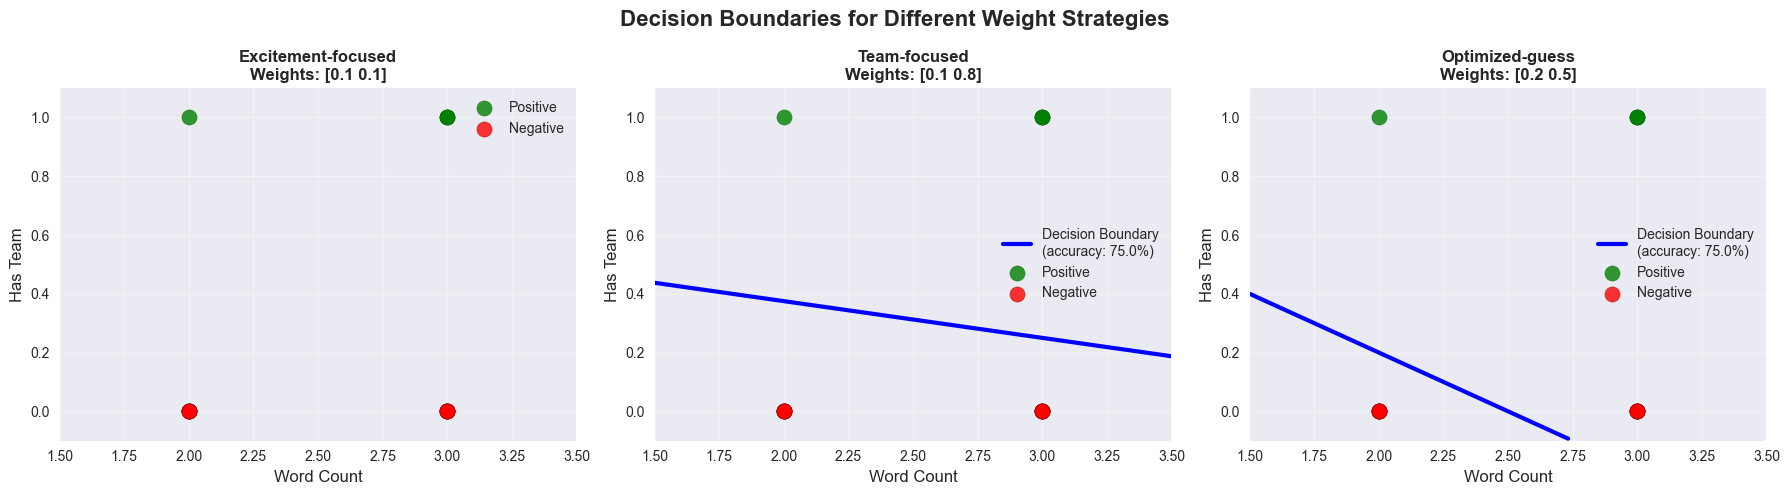


Key Observations:
- Different weights create different decision boundaries
- The boundary separates positive from negative predictions
- Better weights create boundaries that better separate the classes
- This is what the model will learn to optimize!


In [7]:
# TODO: Visualize how different strategies create different decision boundaries
# We'll create a 2D visualization using the first two features

# Extract first two features for visualization
features_2d = features[:, :2]  # [word_count, has_team]

# Create grid for decision boundary visualization
x_min, x_max = features_2d[:, 0].min() - 0.5, features_2d[:, 0].max() + 0.5
y_min, y_max = features_2d[:, 1].min() - 0.1, features_2d[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Plot decision boundaries for top 3 strategies
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (strategy_name, results) in enumerate(ranked_strategies[:3]):
    ax = axes[idx]
    
    # Use only first two weights for 2D visualization
    weights_2d = results['weights'][:2]
    
    # Calculate decision boundary: w1*x1 + w2*x2 = 0.5 (threshold)
    # Rearranged: x2 = (0.5 - w1*x1) / w2
    if abs(weights_2d[1]) > 1e-10:  # Avoid division by zero
        boundary_x = np.linspace(x_min, x_max, 100)
        boundary_y = (0.5 - weights_2d[0] * boundary_x) / weights_2d[1]
        
        # Only plot boundary within our range
        valid_mask = (boundary_y >= y_min) & (boundary_y <= y_max)
        if np.any(valid_mask):
            ax.plot(boundary_x[valid_mask], boundary_y[valid_mask], 'b-', linewidth=3, 
                   label=f'Decision Boundary\n(accuracy: {results["accuracy"]:.1%})')
    
    # Plot data points
    pos_mask = labels == 1
    neg_mask = labels == 0
    
    ax.scatter(features_2d[pos_mask, 0], features_2d[pos_mask, 1], 
              c='green', label='Positive', alpha=0.8, s=120, edgecolors='darkgreen')
    ax.scatter(features_2d[neg_mask, 0], features_2d[neg_mask, 1], 
              c='red', label='Negative', alpha=0.8, s=120, edgecolors='darkred')
    
    ax.set_xlabel('Word Count', fontsize=12)
    ax.set_ylabel('Has Team', fontsize=12)
    ax.set_title(f'{strategy_name}\nWeights: {results["weights"][:2]}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.suptitle('Decision Boundaries for Different Weight Strategies', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Different weights create different decision boundaries")
print("- The boundary separates positive from negative predictions")
print("- Better weights create boundaries that better separate the classes")
print("- This is what the model will learn to optimize!")

## Task 4: From Dot Products to Predictions

Let's complete the picture by understanding how raw dot product scores become meaningful predictions.

In [8]:
# Examine the full pipeline: Features → Dot Product → Activation → Prediction

def sigmoid(x):
    """Sigmoid activation function: maps any real number to (0,1)"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def analyze_full_pipeline(features: np.ndarray, weights: np.ndarray, text: str):
    """
    Show the complete transformation from text to prediction.
    """
    # Step 1: Feature extraction (already done)
    print(f"Input text: '{text}'")
    print(f"Step 1 - Features: {features}")
    
    # Step 2: Dot product (linear combination)
    dot_product = np.dot(features, weights)
    print(f"Step 2 - Dot product: {features} · {weights} = {dot_product:.3f}")
    
    # Step 3: Activation function (sigmoid)
    probability = sigmoid(dot_product)
    print(f"Step 3 - Sigmoid: σ({dot_product:.3f}) = {probability:.3f}")
    
    # Step 4: Final prediction
    prediction = 1 if probability > 0.5 else 0
    confidence = probability if prediction == 1 else (1 - probability)
    sentiment = "POSITIVE" if prediction == 1 else "NEGATIVE"
    
    print(f"Step 4 - Final prediction: {sentiment} (confidence: {confidence:.1%})")
    print()
    
    return dot_product, probability, prediction

# Test with our best-performing weights
best_strategy = ranked_strategies[0]
best_weights = best_strategy[1]['weights']

print(f"FULL PIPELINE ANALYSIS - Using '{best_strategy[0]}' strategy")
print(f"Weights: {best_weights}")
print("=" * 70)

# Analyze a few key examples
key_examples = [
    (features[0], texts[0]),  # "Go Dolphins!"
    (features[1], texts[1]),  # "Terrible game"
    (features[2], texts[2]),  # "Love the fins!"
]

pipeline_results = []
for feature_vec, text in key_examples:
    dot_prod, prob, pred = analyze_full_pipeline(feature_vec, best_weights, text)
    pipeline_results.append((dot_prod, prob, pred))
    print("-" * 50)

FULL PIPELINE ANALYSIS - Using 'Excitement-focused' strategy
Weights: [0.1 0.1 0.8]
Input text: 'Go Dolphins!'
Step 1 - Features: [2. 1. 1.]
Step 2 - Dot product: [2. 1. 1.] · [0.1 0.1 0.8] = 1.100
Step 3 - Sigmoid: σ(1.100) = 0.750
Step 4 - Final prediction: POSITIVE (confidence: 75.0%)

--------------------------------------------------
Input text: 'Terrible game'
Step 1 - Features: [2. 0. 0.]
Step 2 - Dot product: [2. 0. 0.] · [0.1 0.1 0.8] = 0.200
Step 3 - Sigmoid: σ(0.200) = 0.550
Step 4 - Final prediction: POSITIVE (confidence: 55.0%)

--------------------------------------------------
Input text: 'Love the fins!'
Step 1 - Features: [3. 1. 1.]
Step 2 - Dot product: [3. 1. 1.] · [0.1 0.1 0.8] = 1.200
Step 3 - Sigmoid: σ(1.200) = 0.769
Step 4 - Final prediction: POSITIVE (confidence: 76.9%)

--------------------------------------------------


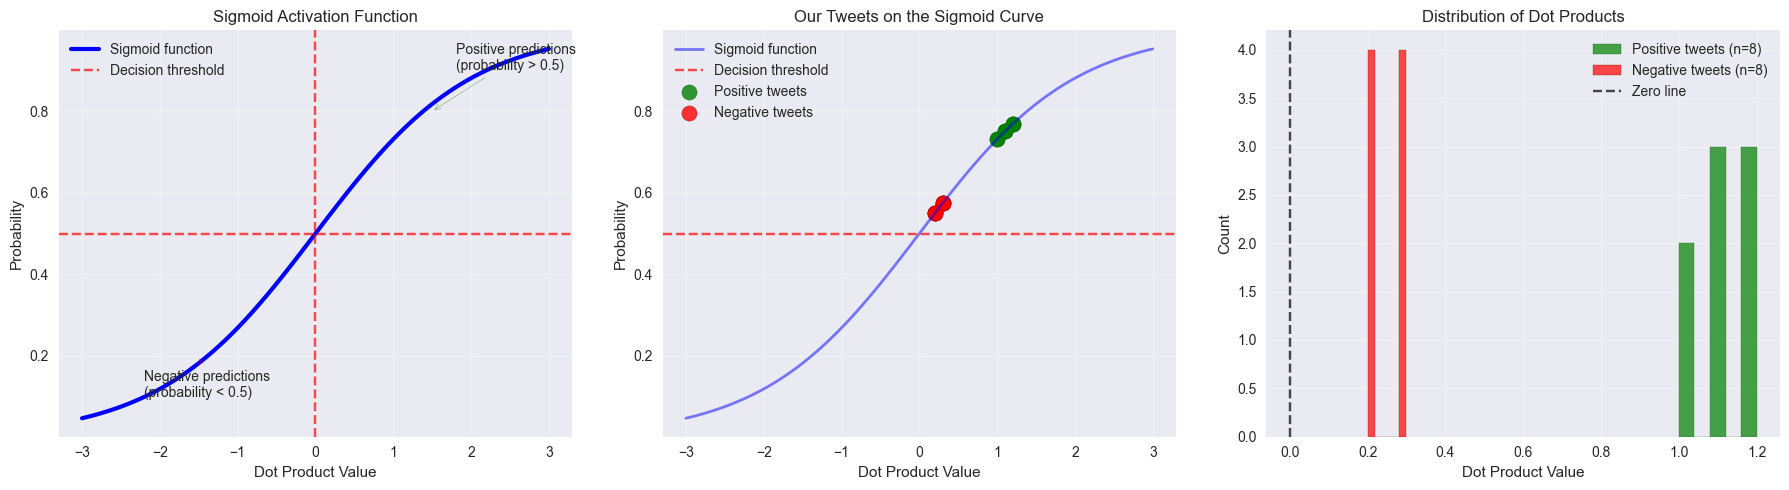


Key Insights about the Sigmoid Function:
1. Maps any dot product value to a probability between 0 and 1
2. Values > 0 become probabilities > 0.5 (positive predictions)
3. Values < 0 become probabilities < 0.5 (negative predictions)
4. Extreme values get 'squashed' - very confident predictions
5. Values near 0 become probabilities near 0.5 - uncertain predictions


In [9]:
# TODO: Explore how the sigmoid function transforms dot products
# Create visualization showing the transformation

# Generate range of dot product values
dot_product_range = np.linspace(-3, 3, 100)
sigmoid_values = sigmoid(dot_product_range)

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Sigmoid function
axes[0].plot(dot_product_range, sigmoid_values, 'b-', linewidth=3, label='Sigmoid function')
axes[0].axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision threshold')
axes[0].axvline(x=0, color='r', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Dot Product Value')
axes[0].set_ylabel('Probability')
axes[0].set_title('Sigmoid Activation Function')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Add annotations
axes[0].annotate('Positive predictions\n(probability > 0.5)', xy=(1.5, 0.8), 
                xytext=(1.8, 0.9), fontsize=10,
                arrowprops=dict(arrowstyle='->', color='green', alpha=0.7))
axes[0].annotate('Negative predictions\n(probability < 0.5)', xy=(-1.5, 0.2), 
                xytext=(-2.2, 0.1), fontsize=10,
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

# Plot 2: Our actual data points on the sigmoid curve
all_dot_products = []
all_probabilities = []
all_labels = []

for i in range(len(features)):
    dot_prod = np.dot(features[i], best_weights)
    prob = sigmoid(dot_prod)
    all_dot_products.append(dot_prod)
    all_probabilities.append(prob)
    all_labels.append(labels[i])

# Plot sigmoid curve
axes[1].plot(dot_product_range, sigmoid_values, 'b-', linewidth=2, alpha=0.5, label='Sigmoid function')
axes[1].axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision threshold')

# Plot our data points
pos_mask = np.array(all_labels) == 1
neg_mask = np.array(all_labels) == 0

axes[1].scatter(np.array(all_dot_products)[pos_mask], np.array(all_probabilities)[pos_mask], 
               c='green', s=120, label='Positive tweets', alpha=0.8, edgecolors='darkgreen')
axes[1].scatter(np.array(all_dot_products)[neg_mask], np.array(all_probabilities)[neg_mask], 
               c='red', s=120, label='Negative tweets', alpha=0.8, edgecolors='darkred')

axes[1].set_xlabel('Dot Product Value')
axes[1].set_ylabel('Probability')
axes[1].set_title('Our Tweets on the Sigmoid Curve')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Distribution of dot products
axes[2].hist(np.array(all_dot_products)[pos_mask], bins=5, alpha=0.7, color='green', 
            label=f'Positive tweets (n={np.sum(pos_mask)})', edgecolor='darkgreen')
axes[2].hist(np.array(all_dot_products)[neg_mask], bins=5, alpha=0.7, color='red', 
            label=f'Negative tweets (n={np.sum(neg_mask)})', edgecolor='darkred')
axes[2].axvline(x=0, color='black', linestyle='--', alpha=0.7, label='Zero line')
axes[2].set_xlabel('Dot Product Value')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Dot Products')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights about the Sigmoid Function:")
print("1. Maps any dot product value to a probability between 0 and 1")
print("2. Values > 0 become probabilities > 0.5 (positive predictions)")
print("3. Values < 0 become probabilities < 0.5 (negative predictions)")
print("4. Extreme values get 'squashed' - very confident predictions")
print("5. Values near 0 become probabilities near 0.5 - uncertain predictions")

## What's Next?

You've now seen how dot products transform features into predictions! Here's what we discovered:

**🔑 Key Insights:**
1. **Dot products measure alignment** between what you observe (features) and what the model learned (weights)
2. **Different weights create different decision patterns** - this is what learning optimizes
3. **Geometric intuition matters** - angles between vectors determine prediction strength
4. **The sigmoid function** converts raw scores into probabilities for decision-making

**🔗 The Connection:**
- **Problem 1**: Text → Features (`[2, 1, 1]`)
- **Problem 2**: Features + Weights → Predictions (via dot products)
- **Problem 3**: Coming up - How do we know if our predictions are good?

**The Big Picture:**
Every neural network, from simple classifiers to ChatGPT, is fundamentally built on billions of these dot product operations. You now understand the mathematical heartbeat of machine learning!

**Coming up in Problem 3: Loss Functions**
- How do we measure prediction quality?
- What makes one set of weights better than another?
- How do we guide the learning process?

The journey from "Go Dolphins!" to AI continues! 🐬➡️🧮➡️🤖